29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.7441 - loss: 0.6870 - val_accuracy: 0.8739 - val_loss: 0.3411
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.8798 - loss: 0.3241 - val_accuracy: 0.8781 - val_loss: 0.3311
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9020 - loss: 0.2631 - val_accuracy: 0.8966 - val_loss: 0.2740
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9145 - loss: 0.2305 - val_accuracy: 0.9028 - val_loss: 0.2675
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.9248 - loss: 0.1992 - val_accuracy: 0.8825 - val_loss: 0.3192


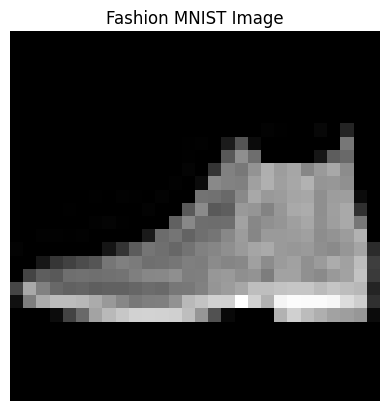

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Description: This is a Ankle boot. It's a very good boot. It's a very good boot. It's a very good boot. It's a very good boot. It's a very good boot. It's a very good boot. It


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
language_model = GPT2LMHeadModel.from_pretrained('gpt2')

def generate_description(class_index):
    descriptions = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]
    input_text = f"This is a {descriptions[class_index]}."
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    outputs = language_model.generate(input_ids, max_length=50, num_return_sequences=1)
    description = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

def describe_image(index):
    image = test_images[index]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title('Fashion MNIST Image')
    plt.axis('off')
    plt.show()

    prediction = model.predict(np.expand_dims(image, axis=0))
    class_index = np.argmax(prediction)
    description = generate_description(class_index)
    print(f"Generated Description: {description}")

describe_image(0)
